# レポート２
## 問題１：クラスタリング
- くずし字のデータを取得して、クラス分類や、クラスタリングを行います。
- TSNEで学習したデータに対してクラスタリングを行うことをします。

In [24]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f62faa5866d53b06663e11a613d84a73666ab4307da7c2b73b3942809ba6a125
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


まずはデータを取得します。

In [1]:
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz -O kmnist-train-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz -O kmnist-train-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz -O kmnist-test-imgs.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz -O kmnist-test-labels.npz
!wget http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv

--2022-05-17 06:14:56--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18384171 (18M)
Saving to: ‘kmnist-train-imgs.npz’

kmnist-train-imgs.n 100%[===================>]  17.53M   878KB/s    in 16s     

2022-05-17 06:15:13 (1.10 MB/s) - ‘kmnist-train-imgs.npz’ saved [18384171/18384171]

--2022-05-17 06:15:13--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29700 (29K)
Saving to: ‘kmnist-train-labels.npz’

kmnist-train-labels 100%[===================>]  29.00K   187KB/s    in 0.2s    

2022-05-17 06:15:13 (187 KB/s) - ‘kmnist-train-labels.npz’ saved [29700/29

--2022-05-17 06:26:58--  http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist_classmap.csv
Resolving codh.rois.ac.jp (codh.rois.ac.jp)... 136.187.88.58
Connecting to codh.rois.ac.jp (codh.rois.ac.jp)|136.187.88.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151 [text/csv]
Saving to: ‘kmnist_classmap.csv’

kmnist_classmap.csv 100%[===================>]     151  --.-KB/s    in 0s      

2022-05-17 06:26:58 (31.8 MB/s) - ‘kmnist_classmap.csv’ saved [151/151]



正解ラベル(0,...9)に対応するひらがなを得ます。最初がindex=1から始まるのに注意です。

In [19]:
names = np.loadtxt('kmnist_classmap.csv', dtype='str')
names

array(['index,codepoint,char', '0,U+304A,お', '1,U+304D,き', '2,U+3059,す',
       '3,U+3064,つ', '4,U+306A,な', '5,U+306F,は', '6,U+307E,ま',
       '7,U+3084,や', '8,U+308C,れ', '9,U+3092,を'], dtype='<U20')

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#最初の5000だけ
train_images = np.load('kmnist-train-imgs.npz')['arr_0'][:5000]
train_labels = np.load('kmnist-train-labels.npz')['arr_0'][:5000]
test_images = np.load('kmnist-test-imgs.npz')['arr_0'][:5000]
test_labels = np.load('kmnist-test-labels.npz')['arr_0'][:5000]

train_imagesにどういうデータがあるかを確認します。

<Figure size 432x288 with 0 Axes>

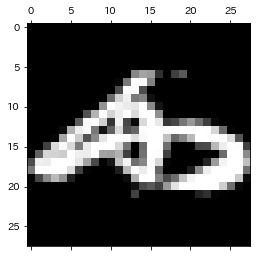

In [52]:
plt.gray()
plt.matshow(train_images[1])

In [57]:
train_data=train_images.reshape(-1, 784)
test_data=test_images.reshape(-1, 784)
train_data[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [54]:
train_images[1].shape

(28, 28)

In [58]:
train_data[1].shape

(784,)

In [47]:
train_images.shape

(60000, 28, 28)

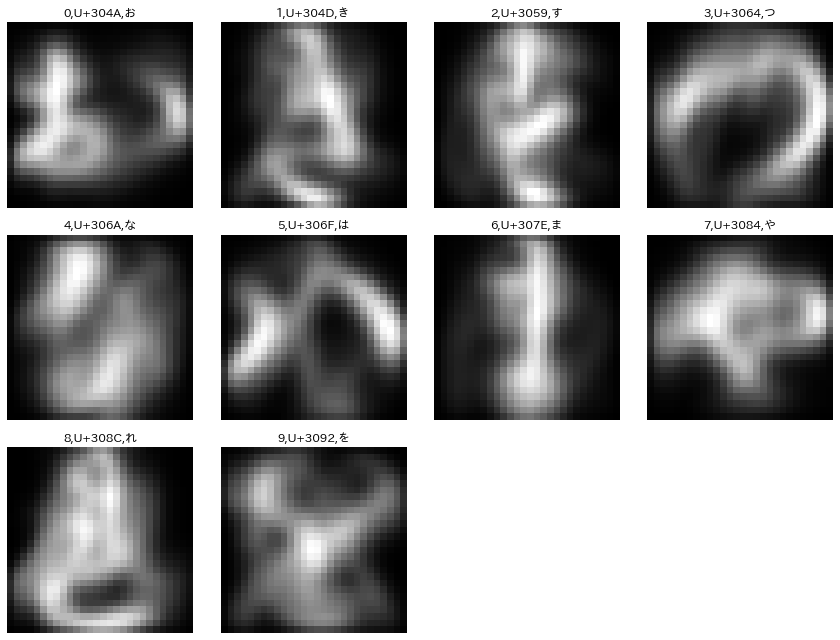

In [28]:
# とりあえず平均をとってみます。

plt.figure(figsize=(12, 9))
for label in range(10):
    plt.subplot(3, 4, label + 1)
    indices = np.where(train_labels == label)
    mean_image = train_images[indices].mean(axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(names[label+1])
    plt.axis('off')
plt.tight_layout()

In [60]:
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics

clf_knn = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=4, weights='distance', n_jobs=7)
clf_knn.fit(train_data, train_labels)
y_pred = clf_knn.predict(test_data)

print(sklearn.metrics.accuracy_score(test_labels, y_pred))
print(sklearn.metrics.classification_report(test_labels, y_pred))
print(sklearn.metrics.confusion_matrix(test_labels, y_pred))


0.8174
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       516
           1       0.87      0.86      0.87       530
           2       0.75      0.80      0.78       495
           3       0.87      0.91      0.89       492
           4       0.88      0.76      0.81       513
           5       0.74      0.85      0.79       485
           6       0.71      0.89      0.79       506
           7       0.92      0.74      0.82       491
           8       0.72      0.87      0.79       504
           9       0.90      0.77      0.83       468

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000

[[380   0   1   2   2  70   3  18  39   1]
 [  0 457  12   0   3   3  36   0  14   5]
 [  5   5 398  20   1   8  27   4  16  11]
 [  0   2  13 448   0  12  13   0   4   0]
 [  9  13  13  11 388  18  25   2  26   8]
 [  1   3  33   8  

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

projected = pca.fit_transform(train_data)
print(projected.shape)

(5000, 2)


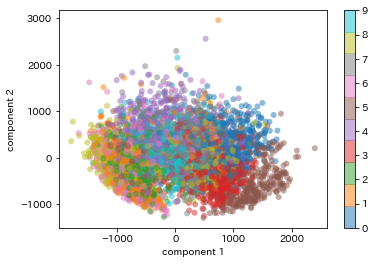

In [64]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=train_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

PCAの結果はイマイチ、、

そこでTSNEの実施

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


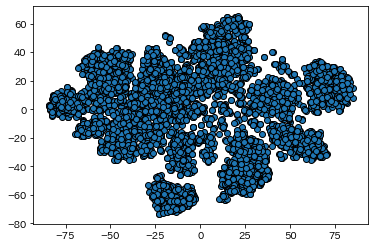

In [74]:
from sklearn.manifold import TSNE
import sklearn.datasets
import seaborn as sns
import pandas as pd

digits2d = TSNE(n_components=2).fit_transform(train_data)

plt.scatter(digits2d[:,0], digits2d[:,1], edgecolors='k')

### ここからが問題です。

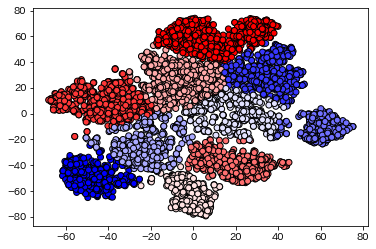

In [73]:
## K平均法をつかってクラスタリングして結果を表示せよ
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import cm

#KMeanをつかう、lecture8_clustering.ipynb　を参考

#クラスタリングした結果を表示するための色付けのための予測
#y_train_est = kmeans.predict(digits2d)

#描画はこのようになるはず。
plt.scatter(digits2d[:,0], digits2d[:,1], c=y_train_est, cmap=cm.bwr, edgecolors='k')

In [ ]:
# クラスタリングの結果と正解値を比較せよ

## 問題２　時系列予測

https://github.com/alod83/papers/blob/master/jsit_covid-tourism/SARIMA%20Model/SARIMA%20IT%20Tourists%20Arrivals.ipynb